## <i>ENGG67 - ANÁLISE E PRÉ-PROCESSAMENTO DE DADOS</i>
**Universidade Federal da Bahia** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Semestre:** 2024.2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Data:** 05/11/2024  
**Disciplina:** ENGG67 - Tópicos Especiais em Engenharia da Computação &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  
**Docente:** Antonio C. L. Fernandes Jr. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Integrantes:** David Oliveira e André Costa  


**1° AVALIAÇÃO:**  
Utilizando o banco de dados **[Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)**, faça o que se pede a seguir:
   1. Univariado ou Multivariado.
      - Determine se o conjunto de dados é univariado ou multivariado.
      - Descreva a quantidade de atributos preditivos e atributos alvo.
   2. Tipo e Escala dos Dados.
      - Caracterize os dados quanto ao tipo e à escala.
   3. Balanceamento e Estatísticas.
      - Verifique a necessidade de balanceamento dos dados.
      - Caracterize estatisticamente os dados, calculando, para cada atributo, as estatísticas univariadas pertinentes, incluindo: Frequência, Moda, Média, Mediana, Desvio padrão, Primeiro quartil (Q1), Terceiro quartil (Q3), Obliquidade e Curtose.
   4. Análise de Qualidade dos Dados.
      - Analise os dados quanto a: Incompletude, Inconsistências, Redundâncias e a Presença de ruído.
   5. Estatísticas Multivariadas
      - Calcule as estatísticas de covariância e correlação para os atributos quantitativos presentes.
      - Interprete os valores obtidos.
   6. Boxplots
      - Trace boxplots dos atributos preditivos e identifique a presença ou ausência de outliers.
   7. Histogramas e Distribuição
      - Plote histogramas dos atributos e interprete a distribuição considerando as classes.
   8. Transformação de Dados
      - Realize uma transformação de dados consistente com o banco sob análise.
   9. Análise de Componentes Principais (PCA)
      - Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos.

In [1]:
# Para executar este projeto é necessária realizar algumas instalações:
#!pip install ucimlrepo pandas numpy colorama matplotlib scipy seaborn scikit-learn

# Importando bibliotecas utilizadas:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from utils import * # Arquivo com funções auxiliares.

**A. Univariado ou Multivariado**  

Como discutimos em sala de aula, são ditos dados univariados aqueles que apresentam apenas um atributo, enquanto dados multivariados possuem múltiplos atributos, permitindo a análise de relações entre eles. Nesse sentido, podemos usar a biblioteca pandas para observar a quantidade de atributos deste conjunto de dados e descobrir que **estamos lidando com dados multivariados**. 

Além disso, rótulos são classificações atribuídas a cada instância do conjunto de dados, que indicam a categoria ou a saída desejada associada às suas características. Esses rótulos são essenciais para o treinamento de modelos preditivos, pois permitem que as máquinas aprendam a relacionar atributos a resultados específicos. Veja a seguir:


In [2]:
# Acessando os atributos do conjunto de dados seguinte as orientações do UCI.
heartDisease = fetch_ucirepo(id=45) 
x, y = heartDisease.data.features, heartDisease.data.targets
  
# Exibir informações do conjunto de dados, lembrando que teremos 303 instâncias ou objetos.
printColorido("LISTA DOS ATRIBUTOS DO CONJUNTO DE DADOS:".upper(), "magenta", " ")
print(list(x.columns))
printColorido("QUANTIDADE DE ATRIBUTOS PREDITIVOS DO CONJUNTO DE DADOS:", "magenta", ' ')
print(x.shape)
printColorido("QUANTIDADE DE RÓTULOS DO CONJUNTO DE DADOS:", "magenta", ' ')
print(y.shape)


LISTA DOS ATRIBUTOS DO CONJUNTO DE DADOS: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
QUANTIDADE DE ATRIBUTOS PREDITIVOS DO CONJUNTO DE DADOS: (303, 13)
QUANTIDADE DE RÓTULOS DO CONJUNTO DE DADOS: (303, 1)


**B. Tipo e Escala dos Dados**  

Para caracterizar os dados do conjunto, é fundamental analisar os tipos de atributos e suas respectivas escalas. Os atributos podem ser classificados em:

- **Quantitativos**, que representam valores numéricos e podem ser contínuos ou discretos (Ex.: altura em centímetros, número de filhos).
- **Qualitativos**, que descrevem características ou categorias (Ex.: tipo de doença, gênero).

Quanto às escalas, temos:

- **Nominais**, que identificam categorias sem uma ordem específica (Ex.: tipos de frutas, marcas de carros);
- **Ordinais**, que representam categorias com uma hierarquia (Ex.: níveis de dor em uma escala de 1 a 5, classificações em uma competição);
- **Intervalares**, onde os atributos são representados por números que variam dentro de um intervalo (Ex.: escalas de temperatura, duração de um evento em minutos e datas em um calendário);
- **Racionais**, que também lidam com medidas numéricas, mas têm um zero significativo. (Ex.: peso em quilogramas, distância em metros)

Na sequência, examinaremos esses aspectos no conjunto de dados, identificando os tipos e escalas de cada atributo para um objeto qualquer.


In [3]:
# Podemos iterar sobre cada um dos objetos e coletar todos os valores possiveis dos atributos, para ajudar a caracterizar cada atributo.
printColorido("TODOS OS VALORES ENCONTRADOS PARA CADA ATRIBUTO:".upper(), "magenta")
valoresPossiveis = obterTodosValoresPossiveis(x, y)
for atributo, valores in valoresPossiveis.items(): # Exibindo os valores possíveis para cada atributo.
    printColorido(f"{atributo.upper()}: ", "yellow", end="")
    print(valores)

printColorido("\nDEFININDO TIPO E ESCALA DOS ATRIBUTOS".upper(), "magenta")
# Selecionamos um objeto qualquer e verificamos o tipo e a escala dos seus atributos, incluindo o atributo alvo:
escolhidoDict = x.iloc[0].to_dict() # Seleciona e converte o objeto em um dicionario.
escolhidoDict['target'] = y.iloc[0].values[0] # Adiciona o atributo alvo.
for attr in escolhidoDict.keys():
    printColorido(f"{attr.upper()}: ", "yellow", end="")
    print(sol[attr])
    
# Outra forma é olhar alguns casos.
# printColorido("\nPrimeiros objetos dos atributos de entrada (X):".upper(), "magenta")
# display(x.head())
# printColorido("Primeiros objetos dos rótulos (Y):".upper(), "magenta")
# display(y.head())

TODOS OS VALORES ENCONTRADOS PARA CADA ATRIBUTO:
AGE: [29.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 74.0, 76.0, 77.0]
SEX: [0.0, 1.0]
CP: [1.0, 2.0, 3.0, 4.0]
TRESTBPS: [94.0, 100.0, 101.0, 102.0, 104.0, 105.0, 106.0, 108.0, 110.0, 112.0, 114.0, 115.0, 117.0, 118.0, 120.0, 122.0, 123.0, 124.0, 125.0, 126.0, 128.0, 129.0, 130.0, 132.0, 134.0, 135.0, 136.0, 138.0, 140.0, 142.0, 144.0, 145.0, 146.0, 148.0, 150.0, 152.0, 154.0, 155.0, 156.0, 158.0, 160.0, 164.0, 165.0, 170.0, 172.0, 174.0, 178.0, 180.0, 192.0, 200.0]
CHOL: [126.0, 131.0, 141.0, 149.0, 157.0, 160.0, 164.0, 166.0, 167.0, 168.0, 169.0, 172.0, 174.0, 175.0, 176.0, 177.0, 178.0, 180.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 192.0, 193.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.

**C. Balanceamento e Estatísticas**  
Para uma análise inicial dos dados, é essencial avaliar se o conjunto está balanceado, especialmente no que diz respeito ao atributo alvo. O balanceamento indica se as classes (por exemplo, presença ou ausência de uma condição) estão representadas de forma equilibrada, o que impacta diretamente o desempenho de modelos preditivos e pode exigir ajustes no pré-processamento.

Em seguida, para entender a estrutura dos dados, é importante analisar estatísticas descritivas, o que fornece uma visão abrangente da distribuição e variabilidade de cada atributo. Para isso, calcularemos as seguintes estatísticas univariadas, interpretando cada uma para melhor compreender o comportamento dos dados e identificar possíveis anomalias:

- **Frequência**: Representa o número de ocorrências de cada valor. É particularmente útil para verificar a distribuição de valores categóricos e detectar desequilíbrios.

- **Moda**: Valor que ocorre com maior frequência em um conjunto de dados. Indica a tendência central para dados categóricos e é menos afetada por valores extremos.

- **Média**: Soma de todos os valores dividida pelo número de observações. É a medida de tendência central mais comum, mas pode ser sensível a valores atípicos.

- **Mediana**: Valor central de um conjunto de dados ordenado. É menos sensível a valores extremos, fornecendo uma medida robusta de tendência central.

- **Desvio Padrão**: Medida de dispersão em torno da média, indicando a variação dos dados. Um desvio padrão alto sugere maior variabilidade nos valores do atributo.

- **Primeiro Quartil (Q1)**: Valor que delimita os primeiros 25% dos dados quando ordenados. Indica a tendência da porção inferior da distribuição.

- **Terceiro Quartil (Q3)**: Valor que delimita os 75% dos dados superiores, oferecendo uma referência para a porção superior da distribuição.

- **Obliquidade (Skewness)**: Medida de simetria dos dados. Valores **positivos** indicam assimetria à direita (cauda alongada à direita), enquanto **valores negativos** indicam assimetria à esquerda (cauda alongada à esquerda). Skewness próxima de zero sugere uma distribuição simétrica.

- **Curtose (Kurtosis)**: Mede a concentração dos dados nas caudas em relação a uma distribuição normal. **Valores positivos** indicam uma distribuição com caudas mais pesadas, enquanto **valores negativos** sugerem caudas leves, com menos valores extremos que uma curva normal.


DISTRIBUIÇÃO DAS CLASSES DOS RÓTULOS:
CLASSE 0: 164
CLASSE 2: 36
CLASSE 1: 55
CLASSE 3: 35
CLASSE 4: 13
SAUDÁVEIS: 164    DOENTES: 139

ESTATÍSTICAS DOS CONJUNTO DE DADOS:
MÉDIA: 54.44
MEDIANA: 56.0
MODA: 58
DESVIO PADRÃO: 9.04
Q1: 48.0   Q3: 61.0
OBLIQUIDADE: -0.208
CURTOSE: -0.535


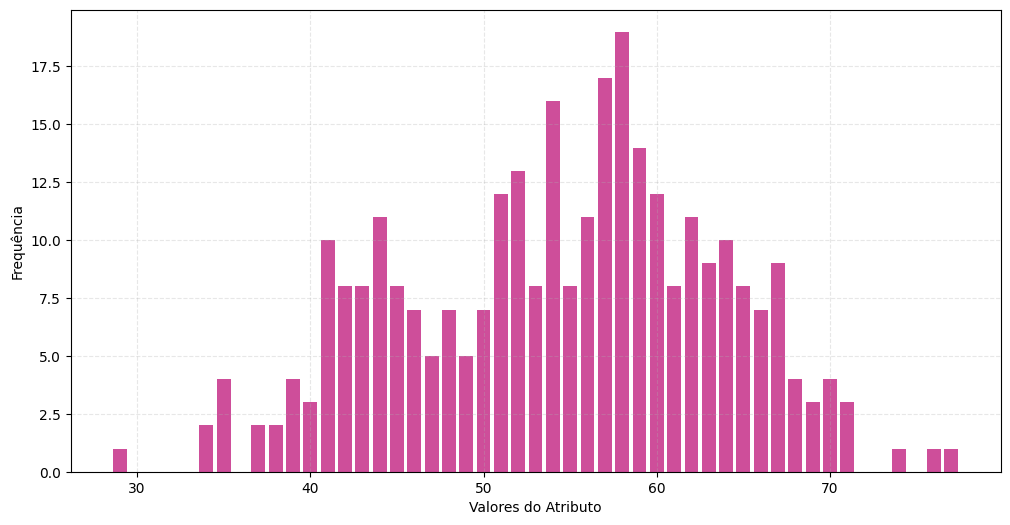

In [4]:
# Balanceamento das classes
classes = contarClasses(y) # Retorna um dicionario com a contagem do número classes.
printColorido("Distribuição das classes dos rótulos:".upper(), "magenta")
for cl, qntd in classes.items():
    printColorido(f"CLASSE {cl}: ", "yellow", "")
    print(qntd)

doentes = 0
for cl, qntd in classes.items():
    if cl != 0: doentes += qntd
printColorido(f"SAUDÁVEIS: ", "green", "")
print(classes[0], end="    ")
printColorido(f"DOENTES: ", "red", "")
print(doentes)

# Estatísticas do conjunto.
printColorido("\nESTATÍSTICAS DOS CONJUNTO DE DADOS:".upper(), "magenta")
atributo = 'age'
array = x[atributo].values
freq = obterFrequenciaPorAtributo(array)

# Média, mediana e moda.
media, mediana, moda = np.mean(array), np.median(array), stats.mode(array, keepdims=True).mode[0]

# Desvio padrão, primeiro quartil (Q1) e terceiro quartil (Q3).
desvioPadrao, q1, q3 = np.std(array, ddof=1), np.percentile(array, 25), np.percentile(array, 75)

# Obliquidade (skewness) e Curtose.
obliquidade, curtose = stats.skew(array), stats.kurtosis(array)

# Exibindo os resultados
printColorido("MÉDIA: ", "yellow", "")
print(f"{round(media, 2)}")
printColorido("MEDIANA: ", "yellow", "")
print(f"{round(mediana, 2)}")
printColorido("MODA: ", "yellow", "")
print(f"{round(moda, 2)}")
printColorido("DESVIO PADRÃO: ", "yellow", "")
print(f"{round(desvioPadrao, 2)}")
printColorido("Q1: ", "yellow", "")
print(f"{round(q1, 2)}", end="   ")
printColorido("Q3: ", "yellow", "")
print(f"{round(q3, 2)}")
printColorido("OBLIQUIDADE: ", "yellow", "")
print(f"{round(obliquidade, 3)}")
printColorido("CURTOSE: ", "yellow", "")
print(f"{round(curtose, 3)}")

# Plotando as frequências dos valores do atributo.
plt.figure(figsize=(12, 6))
plt.bar(freq.keys(), freq.values(), color="#CE4E9A")
# plt.xticks(list(freq.keys()))
plt.xlabel(f'Valores do Atributo')
plt.ylabel('Frequência')
plt.grid(alpha=0.3, linestyle='--')
plt.show()


**D. Análise de Qualidade dos Dados**  
A análise de qualidade dos dados é essencial para garantir a integridade e a confiabilidade dos resultados de qualquer análise ou modelagem. Nesta seção, abordaremos quatro aspectos críticos da qualidade dos dados:

- **Incompletude**: Refere-se à ausência de informações esperadas nos dados, como valores nulos ou faltantes.
  
- **Inconsistências**: Ocorrências de conflitos dentro do conjunto de dados, onde informações contraditórias coexistem.
  
- **Redundâncias**: Dados duplicados que não agregam valor e podem distorcer a interpretação dos resultados.

- **Presença de ruído**: Informação anômala que interfere nos padrões esperados, geralmente causada por erros de medição.

A seguir, apresentaremos uma solução em Python para identificar e avaliar esses problemas em um conjunto de dados.


In [5]:
printColorido("VISUALIZAÇÃO DOS OBJETOS COM INCOMPLETUDE:".upper(), "magenta")
obterIncompletude(x) # Procura, e exibe, quantos dados estão faltando.

# A angina é uma redução de fluxo sanguíneo para o coração que pode ser identificada em exames ECG.
# Temos uma inconsistência se: ECG normal com angina ou s/ angina mas dor tipica.
printColorido("\nVISUALIZAÇÃO DOS OBJETOS COM INCONSISTÊNCIAS:".upper(), "magenta")
obterInconsistencias(x)

printColorido("\nVISUALIZAÇÃO DOS OBJETOS COM REPETIÇÕES:".upper(), "magenta")
obterRedundancias(x) # Encontrar as linhas duplicadas.


printColorido("\nVISUALIZAÇÃO DOS OBJETOS COM RUÍDOS:".upper(), "magenta")
obterRuidos(x) # Procura por valores associados a erros de medição.


VISUALIZAÇÃO DOS OBJETOS COM INCOMPLETUDE:
QUANTIDADE: 6
INDICES: [166, 192, 287, 302, 87, 266]

VISUALIZAÇÃO DOS OBJETOS COM INCONSISTÊNCIAS:
QUANTIDADE: 21
INDICES: [0, 21, 27, 30, 41, 101, 112, 124, 141, 150, 182, 183, 196, 199, 211, 215, 243, 262, 274, 275, 298]

VISUALIZAÇÃO DOS OBJETOS COM REPETIÇÕES:
QUANTIDADE: 0
INDICES: []

VISUALIZAÇÃO DOS OBJETOS COM RUÍDOS:
QUANTIDADE: 3
INDICES: [91, 132, 152]


**E. Estatísticas Multivariadas**  
Nesta seção, calcularemos as estatísticas de covariância e correlação entre os atributos quantitativos do conjunto de dados. Essas estatísticas nos permitirão entender como as variáveis se relacionam entre si e identificar potenciais interações que podem impactar a modelagem preditiva.

- **Covariância**: Medida que indica a direção da relação linear entre duas variáveis. Valores positivos sugerem que, à medida que uma variável aumenta, a outra tende a aumentar, enquanto valores negativos indicam que uma variável tende a diminuir quando a outra aumenta.
  
- **Correlação**: Medida padronizada da relação entre duas variáveis que varia entre -1 e 1. Um valor próximo a 1 indica uma forte correlação positiva, enquanto um valor próximo a -1 indica uma forte correlação negativa. Uma correlação de 0 sugere que não há relação linear entre as variáveis.

Enquanto ambas fornecem informações sobre como duas variáveis se relacionam, a correlação é frequentemente preferida por sua interpretabilidade e escala padronizada. A covariância, embora útil, é mais difícil de interpretar isoladamente devido à sua dependência das unidades das variáveis envolvidas. A seguir, apresentaremos os cálculos e interpretações dos valores obtidos.


VISUALIZAÇÃO DA MATRIZ DE COVARIÂNCIA:


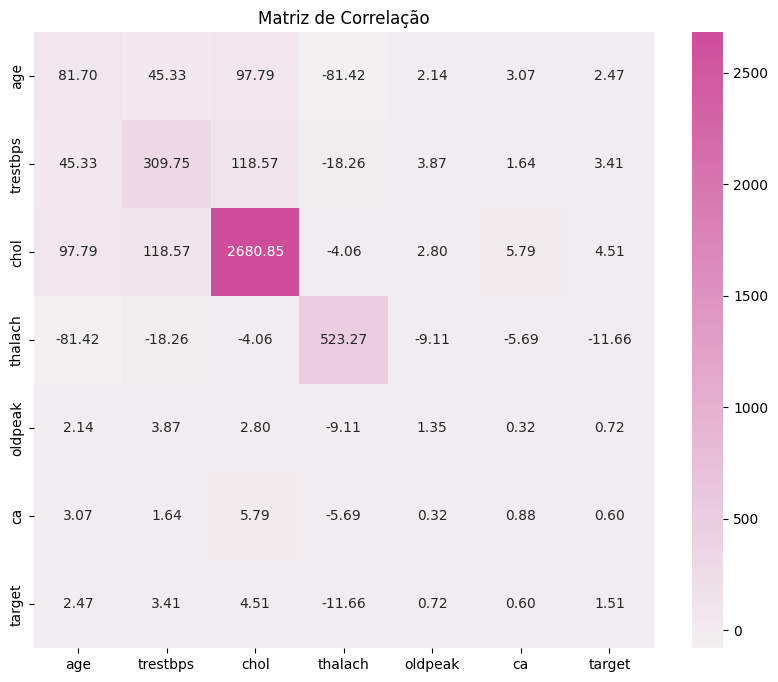


VISUALIZAÇÃO DA MATRIZ DE CORRELAÇÃO:


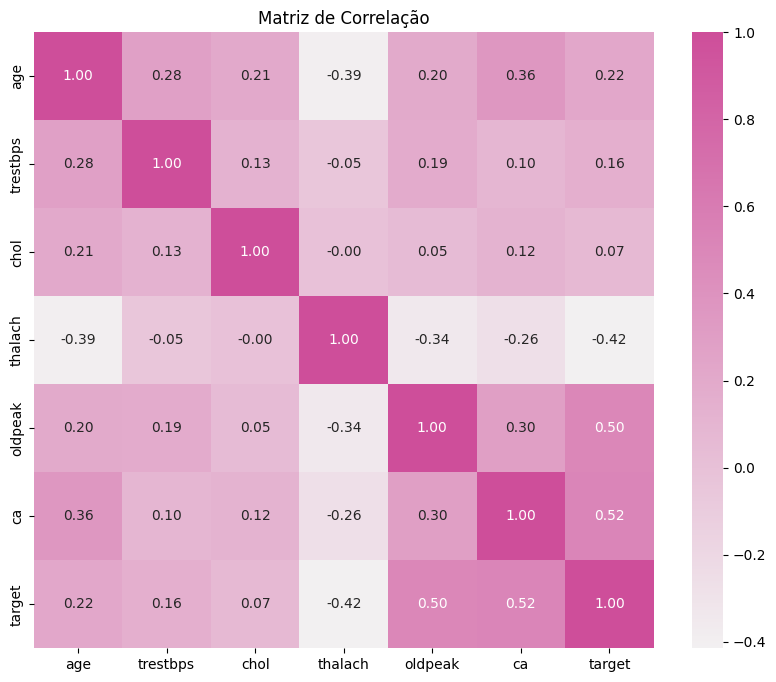

In [6]:
# Selecionando os atributos.
atributos = x.select_dtypes(include=[np.number])
atributos['target'] = y # Incluindo atributos alvo.

quantitativos = [coluna for coluna, tipo in sol.items() if tipo[0] == 'Quantitativo']
atributosQuantitativos = atributos[quantitativos] # Filtrando apenas as colunas quantitativas.
 
# Obtendo a matriz de covariância.
printColorido("VISUALIZAÇÃO DA MATRIZ DE COVARIÂNCIA:".upper(), "magenta")
covariancia = atributosQuantitativos.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(covariancia, annot=True, cmap=sns.light_palette("#CE4E9A", as_cmap=True), fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Obtendo a matriz de correlação.
printColorido("\nVISUALIZAÇÃO DA MATRIZ DE CORRELAÇÃO:".upper(), "magenta")
correlacao = atributosQuantitativos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap=sns.light_palette("#CE4E9A", as_cmap=True), fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

A <span style="color:#DA70AF">interpretação dos valores nas matrizes de covariância e correlação</span> oferece insights sobre as relações e variações entre as variáveis. Abaixo estão os pontos mais destacados:

<span style="color:#EEF394">Covariância:  </span>
    A covariância entre age e thalach (-81,42) é negativa e significativa, indicando que conforme a idade aumenta, a frequência cardíaca máxima (thalach) tende a diminuir. Além disso, a variável chol, nível de colesterol, apresenta valores de covariância elevados com trestbps (118,57) e age (97,79), sinalizando que esses fatores podem influenciar juntos a variação dos níveis de colesterol.

<span style="color:#EEF394">Correlação: </span> 
    A correlação entre age e thalach é -0,39, destacando uma relação inversa moderada; pessoas mais velhas tendem a apresentar menor frequência cardíaca máxima. A variável cp (tipo de dor no peito) apresenta correlações moderadas com target (0,407), sugerindo que o tipo de dor no peito pode estar associado ao desfecho de risco de doenças cardíacas. Note também que target tem correlações mais fortes com thalach (-0,42), oldpeak (0,50) e ca (0,52), apontando que estas variáveis podem ter um papel preditivo importante para o diagnóstico ou classificação de doença cardíaca.

**F. Boxplots**  
Os boxplots são ferramentas visuais valiosas para identificar a presença de outliers e avaliar a distribuição dos atributos preditivos. Nesta seção, criaremos boxplots para cada atributo preditivo do conjunto de dados. 

- **Outliers**: Valores que se afastam significativamente da tendência geral dos dados. A identificação de outliers é crucial, pois eles podem influenciar negativamente modelos preditivos e análises estatísticas.

Analisaremos os boxplots gerados e discutiremos a presença ou ausência de outliers.


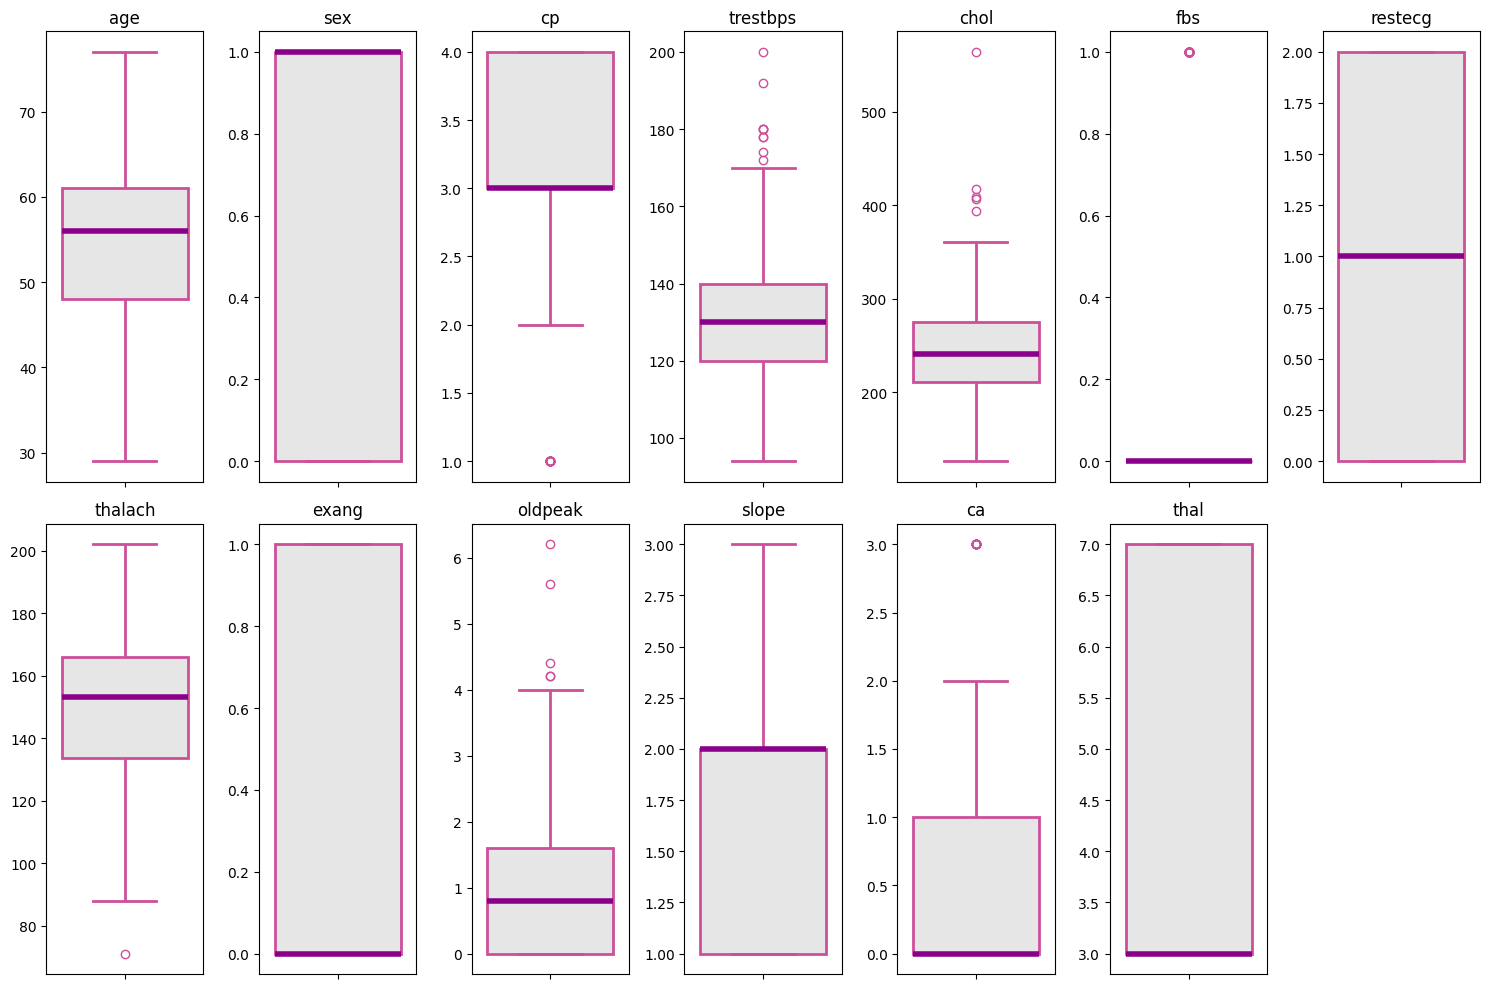

In [7]:
# Criar um boxplot para cada atributo preditivo
plt.figure(figsize=(15, 10))
for i, column in enumerate(x.columns, 1):
    plt.subplot(2,7, i)  # Ajuste o número de linhas e colunas conforme necessário
    sns.boxplot(
        y=x[column].values,
        linecolor="#CE4E9A",
        color=".9",
        linewidth=2,
        flierprops={"color": "red"},
        medianprops={"color": "darkmagenta", "linewidth": 4}
    )
    plt.title(column)

plt.tight_layout()
plt.show()

É possível notar a presença de outliers no boxplots nos seguintes atributos: 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak' e 'ca'. Sendo os atributos mais problemáticos os 'trestbps', 'chol' e 'oldpeak'.

**G. Histogramas e Distribuição**  
Os histogramas nos ajudarão a visualizar a distribuição dos atributos no conjunto de dados, considerando as classes. A interpretação da distribuição é fundamental para entender o comportamento dos dados e como eles se relacionam com as classes.

- **Distribuição**: A forma como os dados estão distribuídos, que pode ser normal, assimétrica ou com múltiplos picos. A compreensão da distribuição é essencial para a seleção de métodos estatísticos apropriados e para a modelagem preditiva.

Vamos gerar e interpretar os histogramas dos atributos.

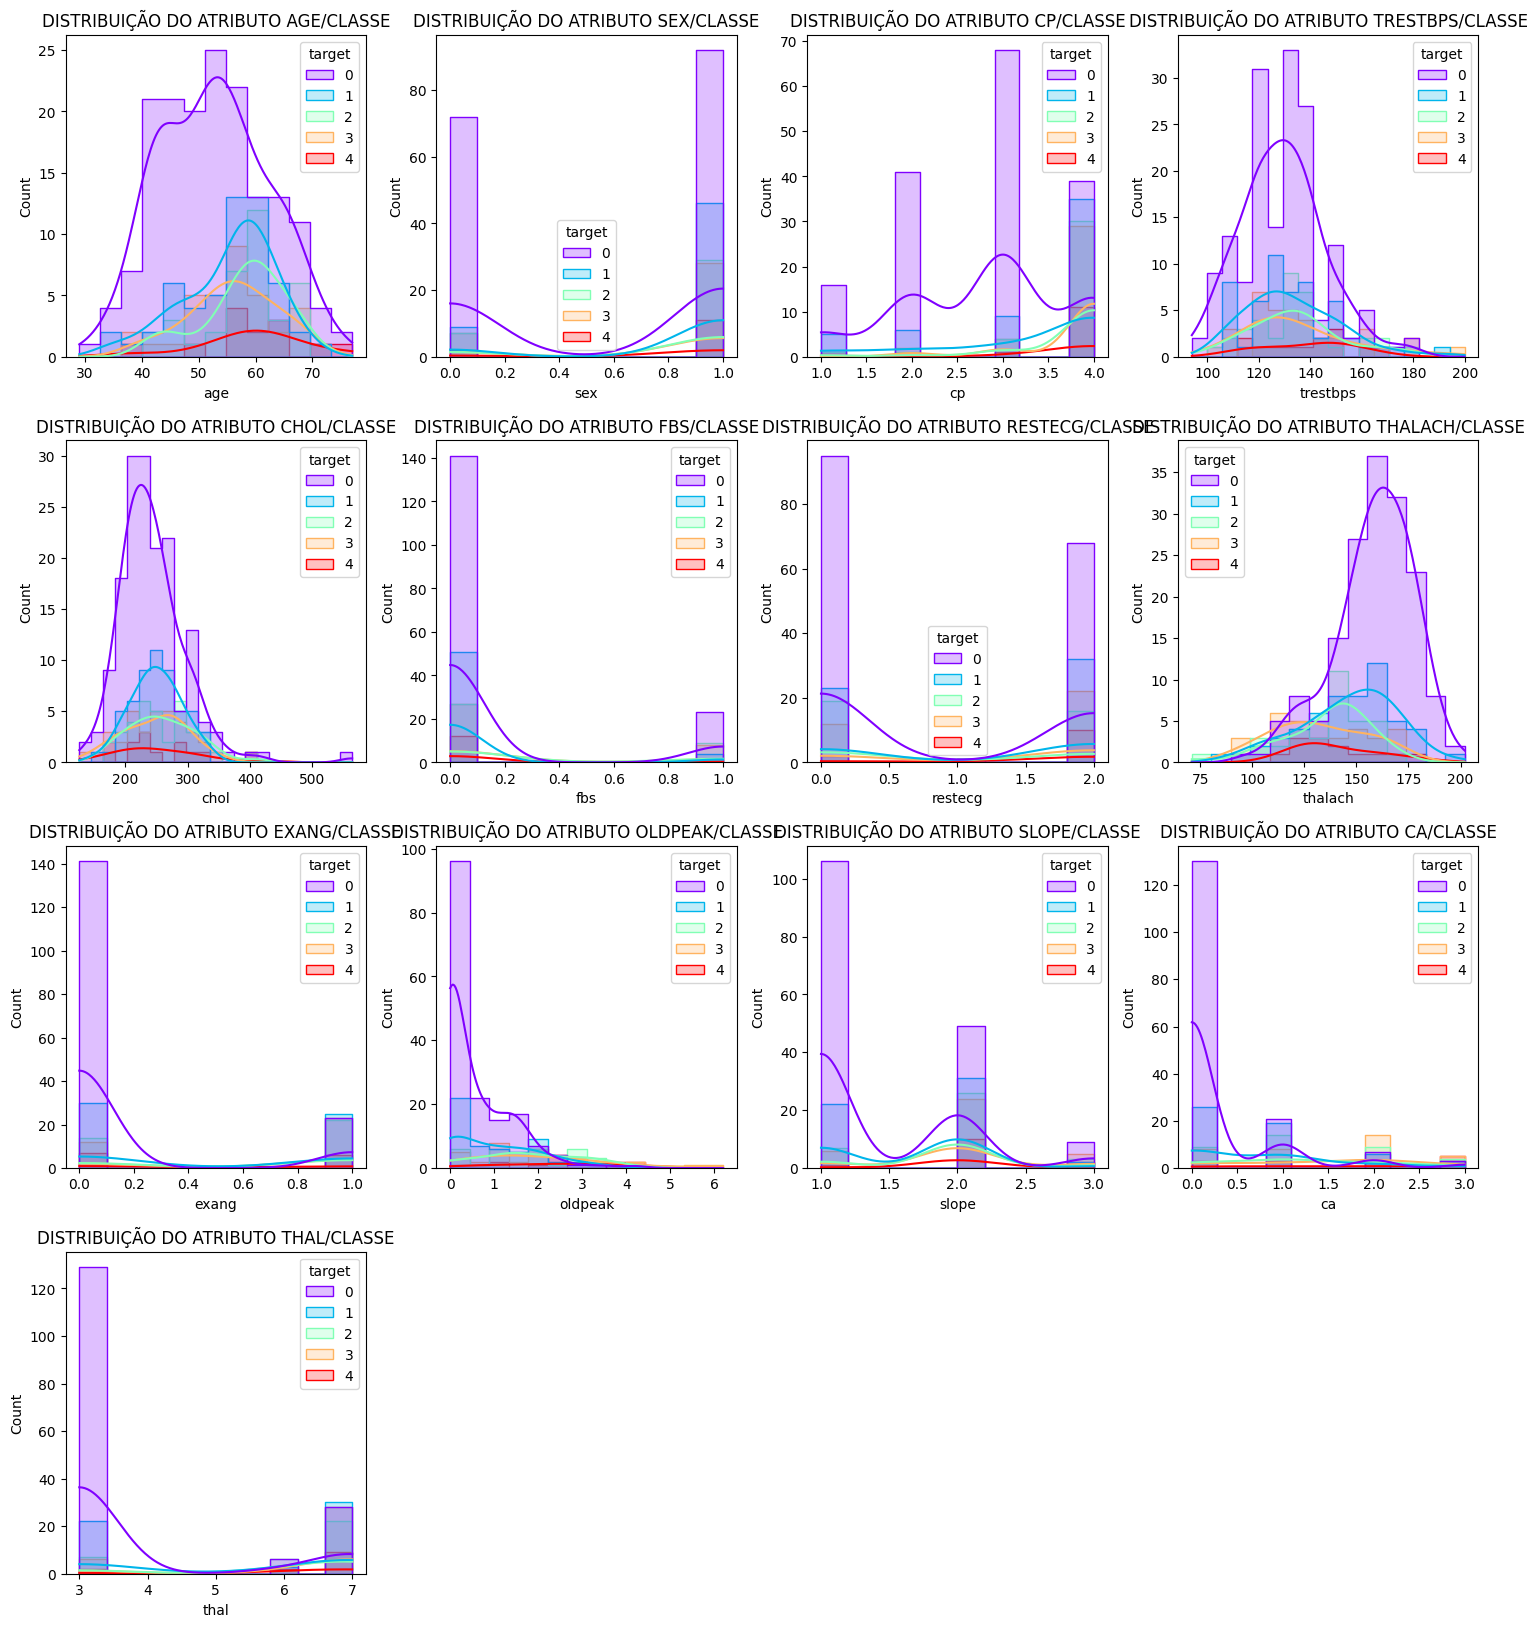

In [8]:
# Combinar os atributos e as classes em um único DataFrame
data = x.copy()
data['target'] = y

# Definir o layout da grade para os histogramas
plt.figure(figsize=(15, 20))
for i, column in enumerate(x.columns, 1):
    plt.subplot(5, 4, i)  # Ajuste o número de linhas e colunas conforme necessário
    sns.histplot(data=data, x=column, hue='target', kde=True, element="step", palette="rainbow")
    plt.title(f'Distribuição do atributo {column}/classe'.upper())

plt.tight_layout()
plt.show()

Podemos fazer <span style="color:#DA70AF">algumas interpretações dos histogramas com as distribuições por classe</span>. Por exemplo, no histograma de nível de colesterol, chol, valores mais baixos estão diretamente relacionados a classe de pacientes saudáveis, por isso o pico entre os valores de 200 a 300. Além disso, na distribuição de idade indica que paciente com idade avançada, próximo aos 60 anos, costumam ser mais diagnosticadas com doenças cardiacas do que pacientes de idades com valores entre 40 a 50 anos.

**H. Transformação de Dados**  
A transformação de dados é uma etapa importante para melhorar a distribuição dos dados e preparar o conjunto de dados. Nesta seção, realizaremos transformações adequadas com base nas características dos dados do conjunto em análise. Neste contexto, podemos aplicar uma transformação por atributos numéricos, já que na sequência será utilizada a análise de componentes principais. Dito isso, o PCA identifica direções de maior variância nos dados e utiliza essas direções para definir os componentes principais. Se os atributos possuem escalas muito diferentes (por exemplo, uma variável variando entre 0 e 1 e outra entre 1.000 e 10.000), a variância dos atributos de maior escala terá um peso muito maior. Isso faz com que o PCA direcione componentes principais para atributos que apresentam variâncias elevadas devido à escala, e não por relevância no contexto do problema.

**Padronização**:  
Define um valor central e um valor de espalhamento comuns para todos os atributos. Desta forma, lidamos melhor com outliers:  

$$
\nu_{Novo} = \frac{\nu_{Atual} - \mu}{\sigma}
$$  

Onde:
- $\nu_{Atual}$ é o valor original do dado,
- $\nu_{Novo}$ é o valor padronizado,
- $\mu$ é a média dos dados,
- $\sigma$ é o desvio padrão dos dados.

A seguir, aplicaremos a transformação necessária.


In [9]:
y = y.values.ravel()  # Convertendo para 1D

# Imputação de valores ausentes
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(x)

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

**I. Análise de Componentes Principais (PCA)**  
Como mencionado no item anterior, a análise de componentes principais (PCA) é uma técnica estatística utilizada para reduzir a dimensionalidade dos dados, mantendo a maior parte da variância. Neste item, utilizaremos PCA para gerar gráficos que ilustram a projeção dos dados no espaço de atributos.

- **PCA**: Permite uma visão mais generalizada dos conjunto de objetos que está sendo avaliado, nesse caso os pacientes. Ele permite o agrupamento dos pacientes que mais se assemelham, quando levado em consideração que eles apresentaram para cada um dos atributos. Tais agrupamentos são baseados em dois componentes principais, construídos a partir da agregação de todos os atributos, sendo o componente principal 1, presente no eixo x, o mais importante e o componente principal 2 o menos, quando comparado ao primeiro. Essa técnica, no entanto, possui a desvantagem de levar a perda dos valores originais dos atributos, o que pode torná-la desiteressante para determinados segmentos, como biologia e finanças, nos quais os valores dos atributos são significativos.

Vamos aplicar PCA e interpretar os gráficos resultantes.

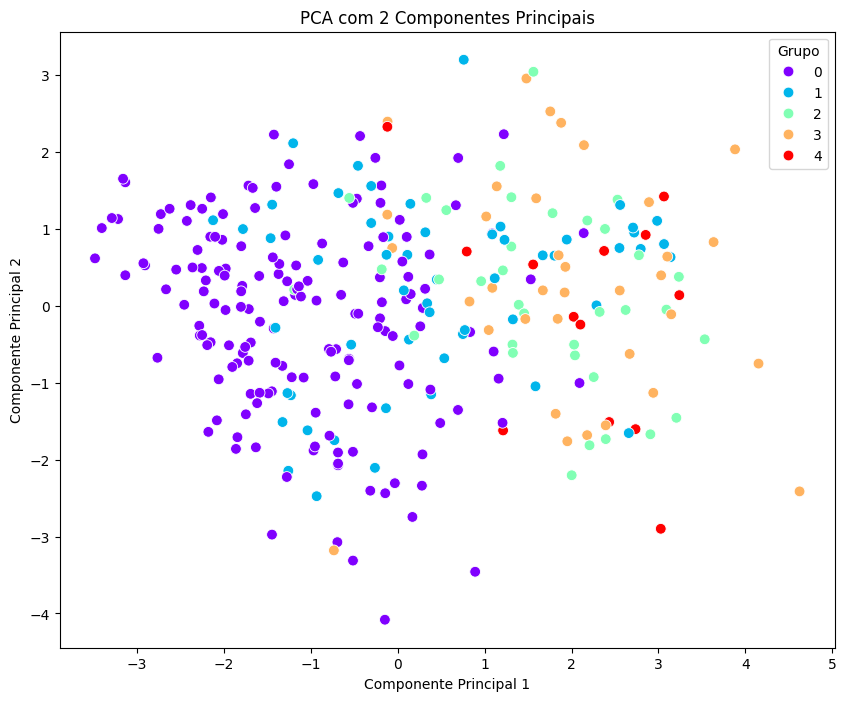

In [10]:
# Aplicar PCA para reduzir para 2 componentes principais
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Visualizar o PCA em 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='rainbow', s=60)
plt.title('PCA com 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Grupo', loc='best')
plt.show()